# MNIST digit rf baseline 

| [open in colab](https://colab.research.google.com/github/emurina/dl_book/blob/master/rf_on_mnist.ipynb.ipynb)


In [1]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix
import keras


Using TensorFlow backend.


In [2]:

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=keras.utils.to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=keras.utils.to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=keras.utils.to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
print(X_train.shape)

(50000, 28, 28, 1)


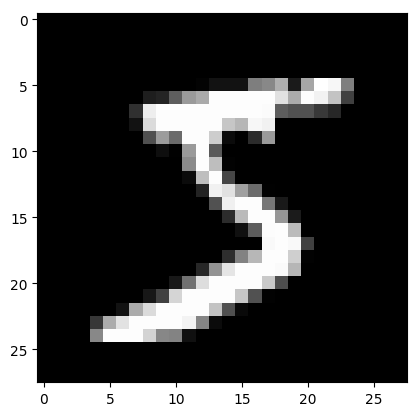

In [4]:
plt.imshow(X_train[0,:,:,0],cmap="gray")

In [5]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train=X_train.reshape(50000,28*28*1)
clf = RandomForestClassifier()
clf.fit(X_train, np.argmax(Y_train,axis=1))  

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
preds=clf.predict(X_test.reshape(10000,28*28*1))

In [7]:
pred=clf.predict(X_test.reshape(10000,28*28*1))
print(confusion_matrix(np.argmax(Y_test,axis=1),pred))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1)==pred)/len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)

[[ 966    0    4    2    0    1    4    1    1    1]
 [   0 1122    2    5    1    1    2    1    1    0]
 [   9    4  973   15    4    1    5   14    6    1]
 [   1    1   14  952    1   16    2    7   12    4]
 [   2    2    6    0  935    1    7    0    4   25]
 [   7    4    3   36    2  815   10    1    4   10]
 [  10    4    2    1    2   11  923    0    5    0]
 [   1    6   23    6    8    1    0  970    5    8]
 [   8    2   17   20    8   17    6    4  881   11]
 [  12    6    3   12   34    8    1    7   14  912]]
Acc_fc_orig_flat =  0.9449
